## Entendimiento de los datos

Importamos nuestras librerias, Es importante que mandemos llamar a del sklearn, las librerias que usaremos a lo largo del análisis.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

from sklearn.multiclass import OneVsRestClassifier

Se importa la base de datos de los Vinos

In [2]:
df = pd.read_csv('/content/WineQT.csv')

Exploramos el dataset, para saber que datos serán utiles para nuestro análisis

In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


Quitamos la Columna de Id, porque no la necesitamos

In [4]:


df.drop(columns="Id",inplace=True)




print("EL Valor de  Quality ",df["quality"].unique())

EL Valor de  Quality  [5 6 7 4 8 3]


In [5]:
from sklearn.preprocessing import LabelEncoder
df['quality'] = LabelEncoder().fit_transform(df['quality'])

In [6]:
df.head()
df['quality'].unique()

array([2, 3, 4, 1, 5, 0])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  


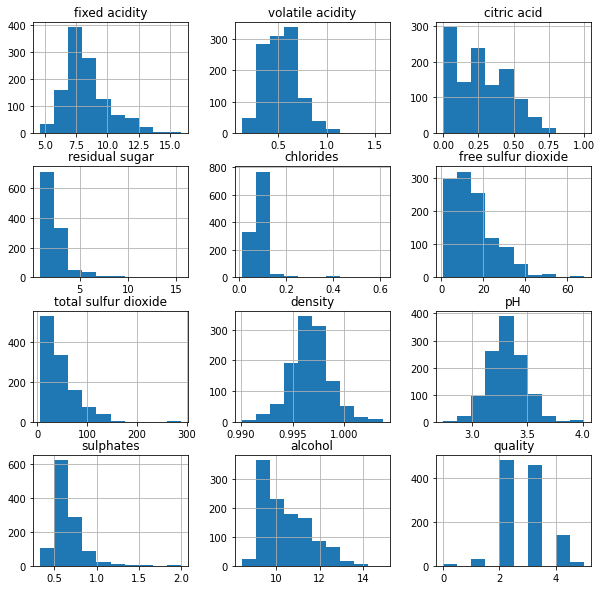

In [7]:
fig, ax = plt.subplots(figsize=(10,10))
df.hist(ax=ax)
plt.show()

In [8]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,2.657043
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,2.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,3.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,3.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,5.000000


In [9]:
df.isna().sum()/df.shape[0]

fixed acidity           0.0
volatile acidity        0.0
citric acid             0.0
residual sugar          0.0
chlorides               0.0
free sulfur dioxide     0.0
total sulfur dioxide    0.0
density                 0.0
pH                      0.0
sulphates               0.0
alcohol                 0.0
quality                 0.0
dtype: float64

In [10]:
X = df.drop('quality',axis=1)
Y = df['quality']

In [11]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=.30,random_state=0,stratify=Y)


In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

In [13]:
model = DecisionTreeClassifier()
#model = DecisionTreeClassifier(max_depth=10,max_leaf_nodes=20)

model.fit(X_train,y_train)  
predictions = model.predict(X_test)


print('Puntaje entrenamiento: {}\n'.format(model.score(X_train,y_train)))
print('Puntaje Test: {}\n'.format(model.score(X_test,y_test)))

Puntaje entrenamiento: 1.0

Puntaje Test: 0.577259475218659



In [14]:
cm = confusion_matrix(y_test, predictions)
print(cm)

[[ 0  0  1  1  0  0]
 [ 0  1  5  3  1  0]
 [ 0  5 97 38  5  0]
 [ 0  1 35 83 16  3]
 [ 0  1  4 20 17  1]
 [ 0  0  0  1  4  0]]


In [15]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.12      0.10      0.11        10
           2       0.68      0.67      0.68       145
           3       0.57      0.60      0.58       138
           4       0.40      0.40      0.40        43
           5       0.00      0.00      0.00         5

    accuracy                           0.58       343
   macro avg       0.30      0.29      0.29       343
weighted avg       0.57      0.58      0.57       343



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Análisis de los datos 

In [16]:
from sklearn.preprocessing import label_binarize
Y = label_binarize(Y, classes=[0,1,2])
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=.30,random_state=0,stratify=Y)

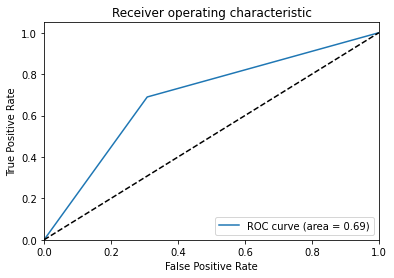

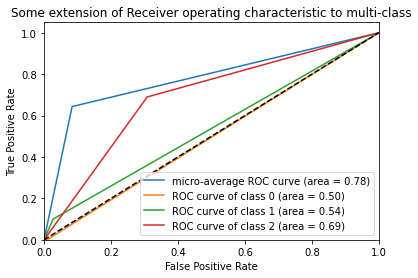

In [17]:
clf = OneVsRestClassifier(model)
y_score = clf.fit(X_train, y_train).predict_proba(X_test)

n_classes = 3
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot of a ROC curve for a specific class
plt.figure()
plt.plot(fpr[2], tpr[2], label='ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

# Plot ROC curve
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})'
                                   ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

En Las gráficas anteriores podemos se representan el  binary y el  multiclass 

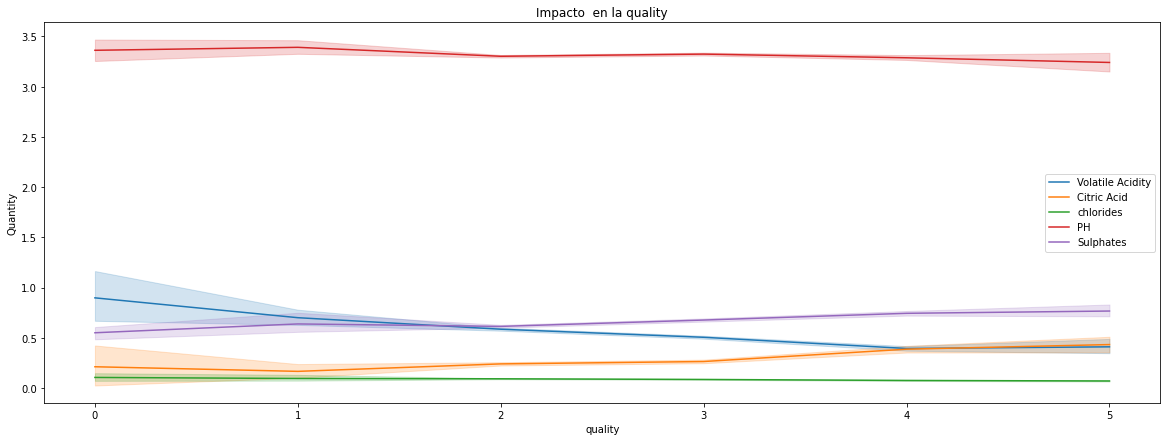

In [18]:

plt.figure(figsize=(20,7))
sns.lineplot(data=df, x="quality",y="volatile acidity",label="Volatile Acidity")
sns.lineplot(data=df, x="quality",y="citric acid",label="Citric Acid")
sns.lineplot(data=df, x="quality",y="chlorides",label="chlorides")
sns.lineplot(data=df, x="quality",y="pH",label="PH")
sns.lineplot(data=df, x="quality",y="sulphates",label="Sulphates")
plt.ylabel("Quantity")
plt.title("Impacto  en la quality")
plt.legend()
plt.show()

Con la Gráfica anterior podemos darnos una idea de que tan importante es cada elemento para poder decir que un vino es de buena calidad.

# Creación de los modelos, Se importan las librerias para Contruir los modelos :







In [19]:



from sklearn.linear_model import LinearRegression ,LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error ,mean_squared_error, median_absolute_error,confusion_matrix,accuracy_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.svm import SVC ,SVR

Se definen los valores de "X" y "Y", y se dividen los datos de entrenamiento para nuestros modelos 

In [20]:


X = df.drop(columns="quality")           
y = df["quality"]    # y = quality

dividimos los datos en datos de entrenamiento y datos de prueba

In [21]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

print("X Train : ", X_train.shape)
print("X Test  : ", X_test.shape)
print("Y Train : ", y_train.shape)

X Train :  (857, 11)
X Test  :  (286, 11)
Y Train :  (857,)


Primero usaremos el modelo de Regresión lineal, hacemos el fit model y mandamos a llamar a nuesros datos x_train y Y_train.
Imprimiremos los valores del modelo, después haremos la predicción del Y value con los valores dex_test y por ultimo imprimimos los resultados.

In [22]:

LR_model=LinearRegression()


LR_model.fit(X_train,y_train)



print("Score the X-train with Y-train is : ", LR_model.score(X_train,y_train))
print("Score the X-test  with Y-test  is : ", LR_model.score(X_test,y_test))


y_pred_LR=LR_model.predict(X_test)


print( " Modelo de Evaluacion  Reg linear : Prom del error absoluto es  ", mean_absolute_error(y_test,y_pred_LR))
print(" Modelo de Evaluacion  Reg linear  : Prom error al cuadrado es " , mean_squared_error(y_test,y_pred_LR))
print(" Modelo de Evaluacion  Reg linear  : mediana del error absoluto es" ,median_absolute_error(y_test,y_pred_LR)) 

Score the X-train with Y-train is :  0.3766893166865495
Score the X-test  with Y-test  is :  0.3487901433645896
 Modelo de Evaluacion  Reg linear : Prom del error absoluto es   0.47425773322055154
 Modelo de Evaluacion  Reg linear  : Prom error al cuadrado es  0.37215517566167367
 Modelo de Evaluacion  Reg linear  : mediana del error absoluto es 0.3771988566534361


Ahora usaremos el modelo de Regresión logistica para sacar otra estimación de nuestros valores, hacemos el fit model y mandamos a llamar a nuesros datos x_train y Y_train. Imprimiremos los valores del modelo, después haremos la predicción del Y value con los valores dex_test y por ultimo imprimimos los resultados.


In [23]:
# using the model Logistic Regression

Lo_model=LogisticRegression(solver='liblinear')

# fit model

Lo_model.fit(X_train,y_train)


# Score X and Y - test and train model Logistic Regression

print("Score the X-train with Y-train is : ", Lo_model.score(X_train,y_train))
print("Score the X-test  with Y-test  is : ", Lo_model.score(X_test,y_test))

# Expected value Y using X test
y_pred_Lo=Lo_model.predict(X_test)

# Model Evaluation
print( " Modelo de Evaluacion  Reg log : Prom del error absoluto es ", mean_absolute_error(y_test,y_pred_Lo))
print(" Modelo de Evaluacion  Reg log  : Prom error al cuadrado es  " , mean_squared_error(y_test,y_pred_Lo))
print(" Modelo de Evaluacion  Reg log  : mediana del error absoluto es" ,median_absolute_error(y_test,y_pred_Lo)) 

print(" Model Evaluation Logistic R : accuracy score " , accuracy_score(y_test,y_pred_Lo))

Score the X-train with Y-train is :  0.5869311551925321
Score the X-test  with Y-test  is :  0.6258741258741258
 Modelo de Evaluacion  Reg log : Prom del error absoluto es  0.4020979020979021
 Modelo de Evaluacion  Reg log  : Prom error al cuadrado es   0.458041958041958
 Modelo de Evaluacion  Reg log  : mediana del error absoluto es 0.0
 Model Evaluation Logistic R : accuracy score  0.6258741258741258


El clasificador de árbol de decisión, crea el modelo de clasificación mediante la construcción de un árbol de decisión. Este lo  usaremos para volver  sacar otra estimación de nuestros valores, hacemos el fit model y mandamos a llamar a nuesros datos x_train y Y_train. Imprimiremos los valores del modelo, después haremos la predicción del Y value con los valores dex_test y por ultimo imprimimos los resultados.


In [24]:
# using the model Decision Tree Classifier
Tree_model=DecisionTreeClassifier(max_depth=10)
# fit model
Tree_model.fit(X_train,y_train)

# Score X and Y - test and train

print("Score del X-train con Y-train es : ", Tree_model.score(X_train,y_train))
print("Score del X-test  con Y-test  es : ", Tree_model.score(X_test,y_test))

Score del X-train con Y-train es :  0.9253208868144691
Score del X-test  con Y-test  es :  0.5314685314685315


Se seleccionan las columnas más relevantes del modelo 

In [25]:


print("The Important columns \n",Tree_model.feature_importances_)

The Important columns 
 [0.06801545 0.11258488 0.07370911 0.07106325 0.07396858 0.07912686
 0.09542973 0.04118477 0.06938626 0.12692822 0.18860289]


Imprimimos las clases, de nuestro tree model, para con eso poder hacer el modelo de evaulación y saber el acuracy score de este modelo.

In [26]:
print("Las clases ",Tree_model.classes_)

y_pred_T =Tree_model.predict(X_test)

print(" Modelo de Evaluacion del Decision Tree : accuracy score " , accuracy_score(y_test,y_pred_T))

Las clases  [0 1 2 3 4 5]
 Modelo de Evaluacion del Decision Tree : accuracy score  0.5314685314685315


los modelos  SVM son más fáciles de explicar para problemas de clasificación. El objetivo de un SVC lineal (Support Vector Classifier) es adecuarse a los datos que usted proporciona, devolviendo un hiperplano “ideal” que divide o categoriza sus datos.

In [27]:
# Aplicando el modelo SVC
svc_model=SVC(C=50,kernel="rbf")

# fit model
svc_model.fit(X_train,y_train)

y_pred_svc =svc_model.predict(X_test)

print("Score del X-train con el Y-train es : ", svc_model.score(X_train,y_train))
print("Score del X-test  con el  Y-test  es : ", svc_model.score(X_test,y_test))
print(" Modelo de  Evaluacion  del Decision Tree : accuracy score " , accuracy_score(y_test,y_pred_svc))

Score del X-train con el Y-train es :  0.5950991831971996
Score del X-test  con el  Y-test  es :  0.6433566433566433
 Modelo de  Evaluacion  del Decision Tree : accuracy score  0.6433566433566433


EL modelo SVR, Es un conjunto de algoritmos de aprendizaje supervisado relacionados directamente con problemas de clasificación y regresión en donde a partir de un conjunto de datos de entrenamiento o muestras y con las clases etiquetadas se entrena una SVM para construir el modelo que prediga la clase de una muestra nueva.

In [28]:
# Aplicando el  modelo SVR

svr_model=SVR(degree=1,coef0=1, tol=0.001, C=1.5,epsilon=0.001)

# fit model
svr_model.fit(X_train,y_train)

y_pred_svr =svc_model.predict(X_test)

print("Score de X-train con Y-train es : ", svr_model.score(X_train,y_train))
print("Score the X-test  con Y-test  es : ", svr_model.score(X_test,y_test))
print(" modelo de evaluación del Decision Tree : accuracy score " , accuracy_score(y_test,y_pred_svr))

Score de X-train con Y-train es :  0.14069185408666485
Score the X-test  con Y-test  es :  0.2350170995614116
 modelo de evaluación del Decision Tree : accuracy score  0.6433566433566433


# Resultados de construcción de modelos:


    ** 1- Regresión Lineal**
     La puntuación del train_X con el  train_Y es: 0,37 %
     La puntuación de la prueba X con la prueba Y es: 0,34 %
     El error absoluto medio es 0.47%
     El error cuadrático medio es 0.37%

     El error absoluto medio es 0.37%

    ** 2- Regresión Logística**

     La puntuación del  train_X con el  train_Y es: 0,58 %
     La puntuación de la prueba X con la prueba Y es: 0,62 %
     El error absoluto medio es 0.40%
     El error cuadrático medio es 0.45%
     El error absoluto medio es 0.0
     Puntuación de precisión 0,625 %

**Clasificador de árboles de decisión**

     La puntuación del train_X con el train_Y es: 0,92 %
     La puntuación de la prueba X con la prueba Y es: 0,54 %
     Puntuación de precisión 0,54 %

**Modelo SVM**

     **1- CVS**
     Calificar el train_X con el train_Y es: 0.59%
     La puntuación de la prueba X con la prueba Y es: 0,64 %

     Puntuación de precisión 0,64 %

     **2-RVS**

     La puntuación del train_X con el train_Y es: 0,14 %
     La puntuación de la prueba X con la prueba Y es: 0,23 %
     Puntuación de precisión 0,64 %